In [1]:
setwd("/bin/Exam")

In [2]:
file_path <- "/bin/Exam/GSE193258_RNAseq_estimated_counts.tsv"


data <- read.table(file_path, header = TRUE, sep = "\t")

# View the data
head(data)

counts=data.frame(data[,c(1,32,33,34,41,42,43)], row.names = rownames(data))
head(counts)
counts_1=data.frame(data[,c(32,33,34,41,42,43)], row.names = rownames(data))
gene_names=counts$gene
rownames(counts_1)=gene_names

,gene,HCC2935_DMSO_1,HCC2935_DMSO_2,HCC2935_DMSO_3,HCC2935_long_wash_1,HCC2935_long_wash_2,HCC2935_long_wash_3,HCC2935_short_wash_1,HCC2935_short_wash_2,HCC2935_short_wash_3,⋯,PC9_osi_acute_3,PC9_short_wash_1,PC9_short_wash_2,PC9_short_wash_3,PC9_long_wash_1,PC9_long_wash_2,PC9_long_wash_3,PC9_osi_DTP_1,PC9_osi_DTP_2,PC9_osi_DTP_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0.5682648,5.155194,2.477012,9.3825599,3.756897,3.657931,5.181001,5.0955982,6.029939,⋯,5.8535371,12.9978395,18.8865019,18.044952,7.8021925,5.553602,14.145045,19.4726655,54.6598821,16.444272
2,A1CF,1.6903967,5.044475,0.000000,0.8530669,16.372231,12.806211,8.635351,4.2878568,3.360871,⋯,2.4764460,5.7916972,13.2814493,7.481299,7.4124338,6.699701,6.749110,14.1457653,7.4760577,9.132462
3,A2M,4.5918067,0.000000,0.000000,0.0000000,13.573063,0.000000,0.000000,0.3701051,0.000000,⋯,0.3590596,0.0000000,11.8258773,8.320874,4.1530829,3.384917,9.265192,0.3616485,33.3906184,7.940929
4,A2ML1,10.9928384,23.050205,26.685158,22.3528821,20.365509,24.832785,21.161743,17.8441506,7.263028,⋯,244.6464245,548.4148524,521.5107147,646.430287,133.8276411,125.312795,515.226738,723.9662025,993.4183288,912.677045
5,A3GALT2,1.0240799,0.000000,0.000000,0.0000000,0.000000,5.150755,0.000000,0.0000000,0.000000,⋯,0.9640867,0.9598506,0.9634092,0.971106,0.9544674,0.000000,0.000000,2.8911717,0.9671412,2.889548
6,A4GALT,443.9211845,480.966346,449.169540,331.2582223,357.440237,272.281982,328.083888,319.5509843,265.040712,⋯,1424.6011545,2082.8428844,2270.7910738,2807.879156,1053.7736860,1097.736260,2337.103769,2322.4511546,3057.6903855,2822.636641


,gene,H1975_DMSO_1,H1975_DMSO_2,H1975_DMSO_3,H1975_osi_DTP_1,H1975_osi_DTP_2,H1975_osi_DTP_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,788.8477841,436.0194563,624.1128152,888.7190056,851.905787,850.062314
2,A1CF,5.9176652,12.3258496,0.8429555,0.8579344,8.969218,9.416306
3,A2M,0.3681615,0.7309377,0.0000000,124.1034271,44.935687,21.881597
4,A2ML1,10.0186959,38.1575548,17.7310213,10.8636700,12.917684,18.431924
5,A3GALT2,1.0000591,0.9945132,2.9958185,2.0160282,3.036452,3.039603
6,A4GALT,564.3877865,340.1630090,409.8402777,668.9767513,655.724842,631.619819


In [3]:
#Data Normalization

matrix=as.matrix(counts_1, rownames.force=NA)
class(matrix)
head(matrix)
install.packages("BiocManager")
BiocManager::install("edgeR")
#I use the edgeR package to make the conversion into CPM of the matrix 
library(edgeR)
matrix_cpm = edgeR::cpm(matrix)
head(matrix_cpm)
#I save the results into a txt file
write.table(matrix_cpm, file = "H1975_table_cpm.txt", sep ="\t", col.names=NA)


[1] "matrix" "array"

,H1975_DMSO_1,H1975_DMSO_2,H1975_DMSO_3,H1975_osi_DTP_1,H1975_osi_DTP_2,H1975_osi_DTP_3
A1BG,788.8477841,436.0194563,624.1128152,888.7190056,851.905787,850.062314
A1CF,5.9176652,12.3258496,0.8429555,0.8579344,8.969218,9.416306
A2M,0.3681615,0.7309377,0.0000000,124.1034271,44.935687,21.881597
A2ML1,10.0186959,38.1575548,17.7310213,10.8636700,12.917684,18.431924
A3GALT2,1.0000591,0.9945132,2.9958185,2.0160282,3.036452,3.039603
A4GALT,564.3877865,340.1630090,409.8402777,668.9767513,655.724842,631.619819


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.21.1), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'edgeR'”
Old packages: 'KernSmooth', 'MASS', 'Matrix', 'Rcpp', 'cpp11', 'digest',
  'evaluate', 'fs', 'jsonlite', 'locfit', 'mgcv', 'vctrs'

Loading required package: limma



,H1975_DMSO_1,H1975_DMSO_2,H1975_DMSO_3,H1975_osi_DTP_1,H1975_osi_DTP_2,H1975_osi_DTP_3
A1BG,16.595225463,10.28022483,14.54158901,20.17025642,17.3383875,20.58156499
A1CF,0.124491683,0.29061204,0.01964054,0.01947157,0.1825457,0.22798601
A2M,0.007745124,0.01723364,0.00000000,2.81663600,0.9145522,0.52979352
A2ML1,0.210766286,0.89965766,0.41312599,0.24656051,0.2629068,0.44627064
A3GALT2,0.021038540,0.02344808,0.06980142,0.04575553,0.0617993,0.07359435
A4GALT,11.873193732,8.02017470,9.54912114,15.18301345,13.3456206,15.29267223


In [4]:
#Data Visualization

normalized_counts = read.table("H1975_table_cpm.txt", sep="\t", header = TRUE, row.names=1)
normalized_counts=log2(normalized_counts+1)
pca <- prcomp(t(normalized_counts))
summary(pca)

variance <- pca$sdev^2
variance_perc <- round(variance/sum(variance)*100, 1)
head(pca$x)
pdf("H1975_screeplot.pdf")
barplot(variance_perc, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation", ylim = c(0,100))
dev.off()

Importance of components:
                           PC1     PC2      PC3      PC4     PC5       PC6
Standard deviation     50.3945 16.3950 11.98016 10.32848 8.41077 1.367e-13
Proportion of Variance  0.8115  0.0859  0.04586  0.03409 0.02261 0.000e+00
Cumulative Proportion   0.8115  0.8974  0.94330  0.97739 1.00000 1.000e+00

,PC1,PC2,PC3,PC4,PC5,PC6
H1975_DMSO_1,-52.97515,18.241784,-2.459494,-0.7371208,-11.2100621,9.443715e-14
H1975_DMSO_2,-33.32743,-25.715923,9.868506,7.1839347,-2.7477227,8.232128e-14
H1975_DMSO_3,-49.23097,5.311382,-2.597891,-3.4385762,14.4447404,6.484539e-13
H1975_osi_DTP_1,48.05740,5.096384,-10.506137,15.8574338,1.5599939,-3.708749e-13
H1975_osi_DTP_2,33.20917,-13.537976,-12.657981,-13.9047952,-2.9353429,-1.100613e-13
H1975_osi_DTP_3,54.26698,10.604349,18.352997,-4.9608764,0.8883935,-3.010840e-13


png 
  2

In [5]:
install.packages("ggplot2")
library(ggplot2)
pca_table <- data.frame(Sample=rownames(pca$x),
                        PC1=pca$x[,1],
                        PC2=pca$x[,2])
dim(pca_table) 
head(pca_table)

pdf("PCA_plot.pdf")
ggplot(data=pca_table, aes(x=PC1, y=PC2, color=Sample)) +
  geom_point() + 
  scale_color_manual(labels = c(rep("treated_osi",3), rep("control_DMSO",3)), 
                     values = c(rep("violetred1",3), rep("mediumpurple3",3))) +
  xlab(paste("PC1 - ", variance_perc[1], "%", sep="")) +
  ylab(paste("PC2 - ", variance_perc[2], "%", sep="")) +
  ggtitle("PCA samples")

dev.off()  

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



[1] 6 3

,Sample,PC1,PC2
,<chr>,<dbl>,<dbl>
H1975_DMSO_1,H1975_DMSO_1,-52.97515,18.241784
H1975_DMSO_2,H1975_DMSO_2,-33.32743,-25.715923
H1975_DMSO_3,H1975_DMSO_3,-49.23097,5.311382
H1975_osi_DTP_1,H1975_osi_DTP_1,48.05740,5.096384
H1975_osi_DTP_2,H1975_osi_DTP_2,33.20917,-13.537976
H1975_osi_DTP_3,H1975_osi_DTP_3,54.26698,10.604349


png 
  2

In [6]:

pc1_loading_scores <- pca$rotation[,1]
pc1_gene_scores <- abs(pc1_loading_scores)


pc1_rank_gene_score<- sort(pc1_gene_scores, decreasing=TRUE)
pc1_top_10_genes <- names(pc1_rank_gene_score[1:10])
pc1_top_10_genes
pc1_top_10_genes = pca$rotation[pc1_top_10_genes,1]

write.table(pc1_top_10_genes, file = "pc1_top10genes.txt", sep ="\t", col.names=NA)

pc2_loading_scores <- pca$rotation[,2]
pc2_gene_scores <- abs(pc2_loading_scores)

[1] "ESRP1"   "CDH1"    "LAD1"    "MAL2"    "VGF"     "TMEM30B" "CNN1"   
 [8] "EDN2"    "MYEOV"   "RTL1"

In [7]:
pc2_rank_gene_score<- sort(pc2_gene_scores, decreasing=TRUE)
pc2_top_10_genes <- names(pc2_rank_gene_score[1:10])
pc2_top_10_genes
pc2_top_10_genes = pca$rotation[pc2_top_10_genes,1]

write.table(pc2_top_10_genes, file = "pc2_top10genes.txt", sep ="\t", col.names=NA)
class(matrix) 

[1] "FOS"        "PLCB4"      "ANXA8L1"    "ANXA8"      "AL035078.4"
 [6] "SERPINA5"   "CXCR5"      "PLXNA4"     "PLEKHS1"    "CCN5"

[1] "matrix" "array"

In [8]:

#BiocManager::install("DESeq2")
library(DESeq2)
treated=counts_1
treated=as.data.frame(lapply(treated, as.integer))
head(treated)
matrix_treated=as.matrix(treated)
coldata=data.frame(samples=dimnames(matrix_treated)[[2]], condition=factor(c(rep("ctrl",3), rep("treat",3))))
dds=DESeqDataSetFromMatrix(countData = matrix_treated, colData = coldata, design = ~condition)
dds=DESeq(dds) 
res=results(dds)
results_df=as.data.frame(res)
results_df$gene=counts$gene
head(results_df)
results_df=results_df[!is.na(results_df$log2FoldChange),]
results_df=results_df[which((results_df$padj<=0.05) &(abs(results_df$log2FoldChange)>=1)),]
head(results_df)
dim(results_df)


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading require

,H1975_DMSO_1,H1975_DMSO_2,H1975_DMSO_3,H1975_osi_DTP_1,H1975_osi_DTP_2,H1975_osi_DTP_3
,<int>,<int>,<int>,<int>,<int>,<int>
1,788,436,624,888,851,850
2,5,12,0,0,8,9
3,0,0,0,124,44,21
4,10,38,17,10,12,18
5,1,0,2,2,3,3
6,564,340,409,668,655,631


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,735.660787,0.49501760,0.2094534,2.363377630,1.810921e-02,4.360523e-02,A1BG
2,5.677788,-0.01118102,1.6634579,-0.006721551,9.946370e-01,9.975953e-01,A1CF
3,31.190673,8.40672897,1.4061637,5.978485321,2.252219e-09,2.435139e-08,A2M
4,17.783363,-0.71392496,0.7695154,-0.927759115,3.535325e-01,4.921508e-01,A2ML1
5,1.827968,1.40932018,1.9393552,0.726695247,4.674127e-01,6.050703e-01,A3GALT2
6,541.280267,0.58035512,0.1984846,2.923930673,3.456417e-03,1.030488e-02,A4GALT


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,31.19067,8.406729,1.4061637,5.978485,2.252219e-09,2.435139e-08,A2M
14,519.24891,-1.185638,0.1758240,-6.743319,1.548084e-11,2.373160e-10,AADAT
17,443.60869,1.354595,0.2163098,6.262289,3.793659e-10,4.656717e-09,AAMDC
19,43.91813,-3.340325,0.5007026,-6.671275,2.535904e-11,3.779855e-10,AANAT
27,95.45950,3.027056,0.4494267,6.735371,1.635122e-11,2.504287e-10,AASS
30,417.24621,1.405086,0.2461975,5.707149,1.148844e-08,1.079280e-07,ABAT


[1] 2778    7

Saving 6.67 x 6.67 in image

Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "A2M"   "AAMDC" "AASS"  "ABAT"  "ABCA5" "ABCB1"

,pos_deg
,<chr>
1,A2M
2,AAMDC
3,AASS
4,ABAT
5,ABCA5
6,ABCB1


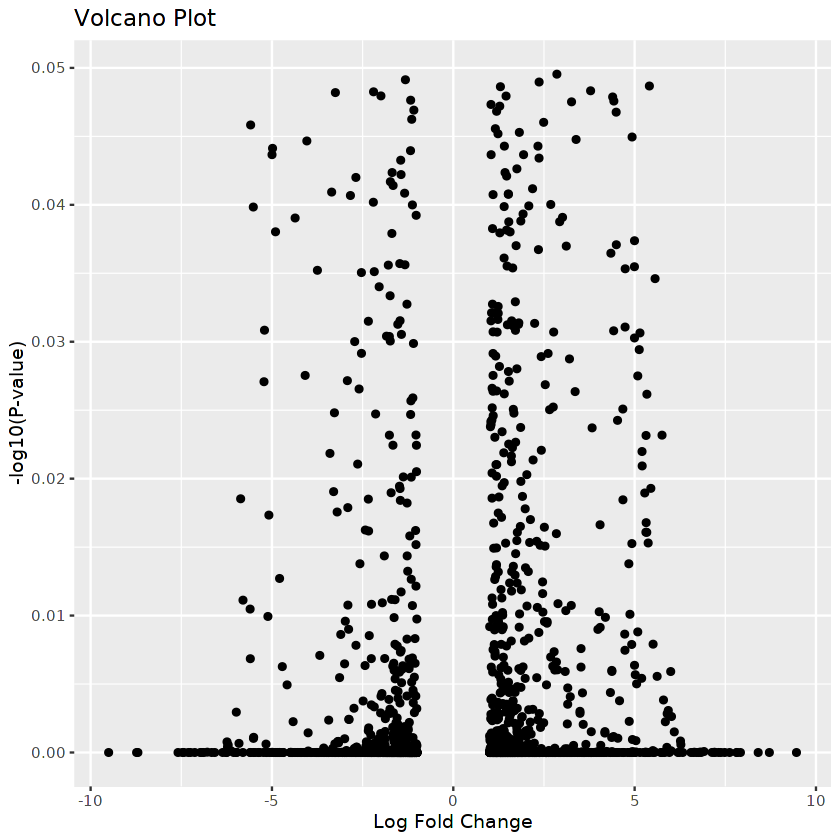

In [9]:
library(ggplot2)

ggplot(results_df, aes(x = log2FoldChange, y = padj)) +
  geom_point() +
  labs(title = "Volcano Plot", x = "Log Fold Change", y = "-log10(P-value)")
ggsave(filename="H1975_Volcano.int.pdf")

#Enriched functional features

gene_list=results_df$gene


gene_list=as.data.frame(gene_list)

library(dplyr)
positive_genes <- dplyr::filter(results_df, log2FoldChange >0)
negative_genes<- dplyr::filter(results_df, log2FoldChange <0)

pos_deg <- positive_genes$gene


head(pos_deg)
neg_deg <-  negative_genes$gene

writeLines(pos_deg, "pos.DEG.int.txt")
writeLines(neg_deg, "neg.DEG.int.txt")
pos_deg=as.data.frame(pos_deg)
neg_deg=as.data.frame(neg_deg)
head(pos_deg)


In [11]:
#install.packages("readxl")
library(readxl)
data_pos <- read_excel("/bin/Exam/Pos_deg_analysis.xltx")

In [12]:
data_pos=as.data.frame(data_pos)
data_pos$`raw P-value`=as.numeric(data_pos$`raw P-value`)
class(data_pos$`raw P-value`)

[1] "numeric"

In [13]:
data_ggp1 <- data.frame(data_pos$`GO biological process complete`[1:20], data_pos$`fold Enrichment`[1:20], -log(data_pos$`raw P-value`[1:20]))

In [14]:
colnames(data_ggp1) = c("biological_process", "fold_enrichment", "log_p_value")

Saving 6.67 x 6.67 in image


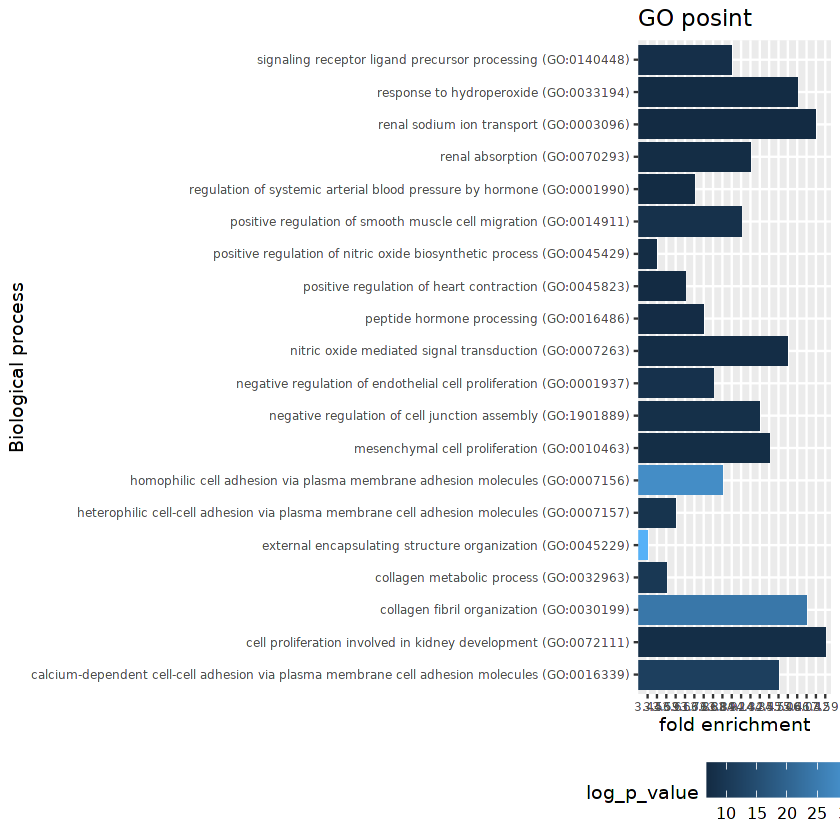

In [15]:
ggplot(data_ggp1) + 
  geom_bar(stat = "identity", 
           aes(y=fold_enrichment,x=biological_process, fill=log_p_value)) +
  labs(fill="log_p_value") +
  theme(legend.position =c("bottom"),
        legend.box="horizontal", 
        legend.text = element_text(size = 9),
        legend.key.height = unit(0.75, "cm"),
        legend.key.width = unit(0.75, "cm"),
        axis.text=element_text(size=7)) +
  scale_x_discrete() +
  labs(title="GO posint", 
       y="fold enrichment", 
       x="Biological process") + 
  coord_flip()
ggsave(filename="GOposdegint.pdf")


[1] "numeric"

[1] 20  3

Saving 6.67 x 6.67 in image


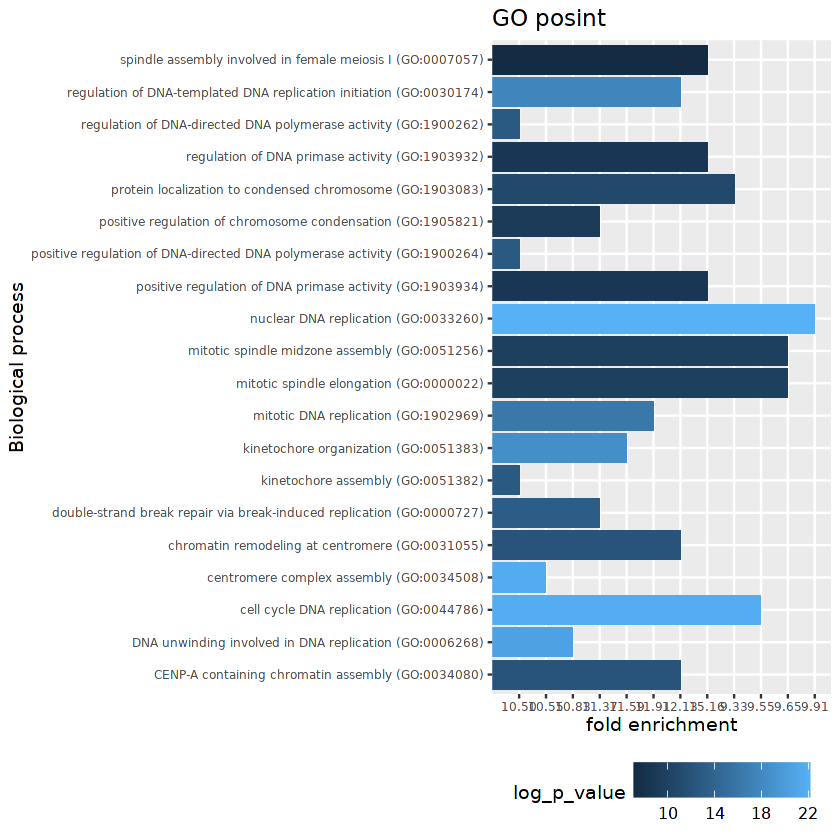

In [16]:
data_neg <- read_excel("/bin/Exam/Neg_deg_analysis.xlt")
data_neg=as.data.frame(data_neg)
data_neg$`raw P-value`=as.numeric(data_neg$`raw P-value`)
class(data_neg$`raw P-value`)
data_ggp2 <- data.frame(data_neg$`GO biological process complete`[1:20], data_neg$`fold Enrichment`[1:20], -log(data_neg$`raw P-value`[1:20]))
colnames(data_ggp2) = c("biological_process", "fold_enrichment", "log_p_value")
dim(data_ggp2)

ggplot(data_ggp2) + 
  geom_bar(stat = "identity", 
           aes(y=fold_enrichment,x=biological_process, fill=log_p_value)) +
  labs(fill="log_p_value") +
  theme(legend.position =c("bottom"),
        legend.box="horizontal", 
        legend.text = element_text(size = 9),
        legend.key.height = unit(0.75, "cm"),
        legend.key.width = unit(0.75, "cm"),
        axis.text=element_text(size=7)) +
  scale_x_discrete() +
  labs(title="GO posint", 
       y="fold enrichment", 
       x="Biological process") + 
  coord_flip()
ggsave(filename="GOnegdegint.pdf")


In [32]:
#PART2

# Set the path to the file narrowpeaks file
Narrow_file_Osim_1 <- "/bin/Exam/Osim-1_H3K27Ac_hs_i53_peaks.narrowPeak"

# Read the file into a data frame
peaks_osim_1 <- read.delim(Narrow_file_Osim_1, header = FALSE, stringsAsFactors = FALSE)
head(peaks_osim_1)
library(readxl)


colnames(neg_deg)[colnames(neg_deg)=="neg_deg"]="SYMBOL"
colnames(pos_deg)[colnames(pos_deg)=="pos_deg"]="SYMBOL"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,chr1,903600,903817,X13_07BS_00YDAZ_H1975-Osim-1_H3K27Ac_hs_i53_peak_1,23,.,3.53702,4.15945,2.38870,152
2,chr1,905094,905816,X13_07BS_00YDAZ_H1975-Osim-1_H3K27Ac_hs_i53_peak_2,120,.,7.27846,14.21410,12.08320,177
3,chr1,940469,940830,X13_07BS_00YDAZ_H1975-Osim-1_H3K27Ac_hs_i53_peak_3,191,.,8.17650,21.41390,19.12180,183
4,chr1,941027,941521,X13_07BS_00YDAZ_H1975-Osim-1_H3K27Ac_hs_i53_peak_4,91,.,4.69125,11.25050,9.19753,173
5,chr1,958548,959271,X13_07BS_00YDAZ_H1975-Osim-1_H3K27Ac_hs_i53_peak_5,227,.,11.18970,25.11720,22.75580,521
6,chr1,964958,965171,X13_07BS_00YDAZ_H1975-Osim-1_H3K27Ac_hs_i53_peak_6,25,.,3.31341,4.34612,2.56258,28


In [18]:
# Install and load the biomaRt package
#BiocManager::install("biomaRt")
library(biomaRt)




In [36]:
library(biomaRt)
ensembl <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")


pos_gene_info <- getBM(attributes = c("external_gene_name", "chromosome_name", "start_position", "end_position"),
                       filters = "external_gene_name",
                       values = pos_deg$SYMBOL,
                       mart = ensembl)

# Merge gene_df with gene_info based on gene symbol
location_pos_genes<- merge(pos_deg, pos_gene_info, by.x = "SYMBOL", by.y = "external_gene_name")



In [27]:
library(biomaRt)

ensembl <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

# Get gene annotation attributes for each gene symbol
neg_gene_info <- getBM(attributes = c("external_gene_name", "chromosome_name", "start_position", "end_position"),
                       filters = "external_gene_name",
                       values = neg_deg$SYMBOL,
                       mart = ensembl)



In [28]:
location_neg_genes<- merge(neg_deg, neg_gene_info, by.x = "SYMBOL", by.y = "external_gene_name")

In [29]:
write.table(location_pos_genes, file = "location_pos_genes.txt", sep = "\t", row.names = FALSE)
write.table(location_neg_genes, file = "location_neg_genes.txt", sep = "\t", row.names = FALSE)

In [30]:

location_pos_genes <- read.table("location_pos_genes.txt", header = TRUE, sep = "\t")
location_neg_genes <- read.table("location_neg_genes.txt", header = TRUE, sep = "\t")


In [34]:

peaks_osim_1_regions=peaks_osim_1[,c("V1", "V2", "V3", "V4")]
colnames(peaks_osim_1_regions) <- c("seqname", "peakStart", "peakEnd", "peakID")

In [37]:
#BiocManager::install("GenomicRanges", force=TRUE)

library(GenomicRanges)




In [38]:

gene_ranges_pos<- GRanges(
  seqnames = rep("ArtificialChromosome", length(location_pos_genes$start_position)),
  ranges = IRanges(location_pos_genes$start_position, location_pos_genes$end_position)
)


peak_osim_1_ranges <- GRanges(
  seqnames = rep("ArtificialChromosome", length(peaks_osim_1_regions$peakStart)),
  ranges = IRanges(peaks_osim_1_regions$peakStart, peaks_osim_1_regions$peakEnd)
)


overlapping_genes_1_pos <- findOverlaps(gene_ranges_pos, peak_osim_1_ranges)

In [ ]:
overlapping_indexes_1_pos <- subjectHits(overlapping_genes_1_pos)
overlapping_gene_names_osim_1_pos <- location_pos_genes$SYMBOL[overlapping_indexes_1_pos]
overlapping_gene_names_osim_1_pos=as.data.frame(overlapping_gene_names_osim_1_pos)
dim(overlapping_gene_names_osim_1_pos)


In [40]:
overlapping_gene_names_osim_1_pos<- subset(overlapping_gene_names_osim_1_pos, overlapping_gene_names_osim_1_pos !="NA")
dim(overlapping_gene_names_osim_1_pos)
overlapping_gene_names_osim_1_pos

[1] 1730    1

,overlapping_gene_names_osim_1_pos
,<chr>
1,CPAMD8
2,CPE
3,CPNE4
4,CPQ
5,CPS1
6,CPZ
7,CRACR2A
116,CMTM8
117,CMYA5


In [42]:

gene_ranges_neg<- GRanges(
  seqnames = rep("ArtificialChromosome", length(location_neg_genes$start_position)),
  ranges = IRanges(location_neg_genes$start_position, location_neg_genes$end_position)
)


peak_osim_1_ranges <- GRanges(
  seqnames = rep("ArtificialChromosome", length(peaks_osim_1_regions$peakStart)),
  ranges = IRanges(peaks_osim_1_regions$peakStart, peaks_osim_1_regions$peakEnd)
)

overlapping_genes_1_neg <- findOverlaps(gene_ranges_neg, peak_osim_1_ranges)

In [61]:
overlapping_indexes_1_neg <- subjectHits(overlapping_genes_1_neg)
overlapping_gene_names_osim_1_neg <- location_neg_genes$SYMBOL[overlapping_indexes_1_neg]
overlapping_gene_names_osim_1_neg=as.data.frame(overlapping_gene_names_osim_1_neg)
dim(overlapping_gene_names_osim_1_neg)



[1] 32665     1

In [44]:
overlapping_gene_names_osim_1_neg<- subset(overlapping_gene_names_osim_1_neg, overlapping_gene_names_osim_1_neg !="NA")
dim(overlapping_gene_names_osim_1_neg)
overlapping_gene_names_osim_1_neg


[1] 742   1

,overlapping_gene_names_osim_1_neg
,<chr>
400,MAP7
401,MAPK13
402,MAPK8IP2
403,MARCHF4
404,MARVELD3
405,MASTL
406,MATK
407,MBNL3
408,MBOAT1


In [45]:
#I obtained the overlappin with the downregulated genes

#graphical rappresentation

#Plot genes that overlap  
# Example data
overlap_positive_1= 1759 # Number of overlapping genes
overlap_negative_1 = 710

total_genes_DE = 2778

In [46]:
prop_overlap_pos_1 <- overlap_positive_1 / total_genes_DE
prop_overlap_neg_1 <- overlap_negative_1 / total_genes_DE


proportions_1 <- data.frame(
  Category = c("Positive_DE_genes", "Negative_DE_genes"),
  Proportion = c(prop_overlap_pos_1, prop_overlap_neg_1)
)

In [49]:
png("barplot1.png", width = 2000, height = 3000, res = 400)
barplot(proportions_1$Proportion, names.arg = proportions_1$Category, 
        xlab = "Category", ylab = "Proportion", main = "Overlapping with ChIP peaks Osim 1",
        col = c("palevioletred", "olivedrab"), ylim = c(0, max(proportions_1$Proportion) * 1.2))
dev.off()

png 
  2

In [57]:
#SAMPLE2

# Set the path to the file narrowpeaks file
Narrow_file_Osim_2 <- "/bin/Exam/Osim-2_H3K27Ac_hs_i54_peaks.narrowPeak"

peaks_osim_2 <- read.delim(Narrow_file_Osim_2, header = FALSE, stringsAsFactors = FALSE)
head(peaks_osim_2)
library(readxl)

peaks_osim_2_regions=peaks_osim_2[,c("V1", "V2", "V3", "V4")]
colnames(peaks_osim_2_regions) <- c("seqname", "peakStart", "peakEnd", "peakID")

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,chr1,817110,817382,X14_07BT_00YDAZ_H1975-Osim-2_H3K27Ac_hs_i54_peak_1,54,.,4.91365,7.34785,5.48118,198
2,chr1,904010,905478,X14_07BT_00YDAZ_H1975-Osim-2_H3K27Ac_hs_i54_peak_2,287,.,13.10310,30.93860,28.73920,460
3,chr1,906392,907062,X14_07BT_00YDAZ_H1975-Osim-2_H3K27Ac_hs_i54_peak_3,24,.,2.91276,4.16465,2.40386,614
4,chr1,920598,920881,X14_07BT_00YDAZ_H1975-Osim-2_H3K27Ac_hs_i54_peak_4,63,.,3.66916,8.24548,6.35513,123
5,chr1,923479,923761,X14_07BT_00YDAZ_H1975-Osim-2_H3K27Ac_hs_i54_peak_5,54,.,4.54859,7.33206,5.46603,234
6,chr1,924058,925634,X14_07BT_00YDAZ_H1975-Osim-2_H3K27Ac_hs_i54_peak_6,777,.,23.06780,80.26830,77.75610,744


In [58]:
gene_ranges_pos<- GRanges(
  seqnames = rep("ArtificialChromosome", length(location_pos_genes$start_position)),
  ranges = IRanges(location_pos_genes$start_position, location_pos_genes$end_position)
)


peak_osim_2_ranges <- GRanges(
  seqnames = rep("ArtificialChromosome", length(peaks_osim_2_regions$peakStart)),
  ranges = IRanges(peaks_osim_2_regions$peakStart, peaks_osim_2_regions$peakEnd)
)

overlapping_genes_2_pos <- findOverlaps(gene_ranges_pos, peak_osim_2_ranges)


In [62]:
overlapping_indexes_2_pos <- subjectHits(overlapping_genes_2_pos)
overlapping_gene_names_osim_2_pos <- location_pos_genes$SYMBOL[overlapping_indexes_2_pos]
overlapping_gene_names_osim_2_pos=as.data.frame(overlapping_gene_names_osim_2_pos)
dim(overlapping_gene_names_osim_2_pos)


[1] 47100     1

In [63]:
overlapping_gene_names_osim_2_pos<- subset(overlapping_gene_names_osim_2_pos, overlapping_gene_names_osim_2_pos !="NA")
dim(overlapping_gene_names_osim_2_pos)
overlapping_gene_names_osim_2_pos

[1] 1735    1

,overlapping_gene_names_osim_2_pos
,<chr>
1,COL4A3
2,COL4A4
3,COL4A5
79,CNN1
177,LOXL2
178,LOXL4
179,LPAR1
180,LRAT
181,LRATD1


In [64]:
gene_ranges_neg<- GRanges(
  seqnames = rep("ArtificialChromosome", length(location_neg_genes$start_position)),
  ranges = IRanges(location_neg_genes$start_position, location_neg_genes$end_position)
)
peak_osim_2_ranges <- GRanges(
  seqnames = rep("ArtificialChromosome", length(peaks_osim_2_regions$peakStart)),
  ranges = IRanges(peaks_osim_2_regions$peakStart, peaks_osim_2_regions$peakEnd)
)

overlapping_genes_2_neg <- findOverlaps(gene_ranges_neg, peak_osim_2_ranges)

In [65]:
overlapping_indexes_2_neg <- subjectHits(overlapping_genes_2_neg)
overlapping_gene_names_osim_2_neg <- location_neg_genes$SYMBOL[overlapping_indexes_2_neg]
overlapping_gene_names_osim_2_neg=as.data.frame(overlapping_gene_names_osim_2_neg)
dim(overlapping_gene_names_osim_2_neg)


[1] 28029     1

In [66]:
overlapping_gene_names_osim_2_neg<- subset(overlapping_gene_names_osim_2_neg, overlapping_gene_names_osim_2_neg !="NA")
dim(overlapping_gene_names_osim_2_neg)
overlapping_gene_names_osim_2_neg

[1] 763   1

,overlapping_gene_names_osim_2_neg
,<chr>
359,LYAR
360,LYPD3
361,LYPD5
362,MAB21L4
363,MACC1
364,MAD2L1
579,IFI44
580,IFI44L
581,IFIH1


In [67]:
overlap_positive_2= 1740 # Number of overlapping genes
overlap_negative_2 = 742

total_genes_DE = 2778


prop_overlap_pos_2 <- overlap_positive_2 / total_genes_DE
prop_overlap_neg_2 <- overlap_negative_2 / total_genes_DE

In [68]:
proportions_2 <- data.frame(
  Category = c("Positive_DE_genes", "Negative_DE_genes"),
  Proportion = c(prop_overlap_pos_2, prop_overlap_neg_2)
)

In [69]:
png("barplot2.png", width = 2000, height = 3000, res = 400)
barplot(proportions_2$Proportion, names.arg = proportions_2$Category, 
        xlab = "Category", ylab = "Proportion", main = "Overlapping with ChIP peaks Osim 2",
        col = c("orange", "skyblue"), ylim = c(0, max(proportions_2$Proportion) * 1.2))
dev.off()

png 
  2

In [75]:
#SAMPLE3

# Set the path to the file narrowpeaks file
Narrow_file_Osim_3 <- "/bin/Exam/Osim-3_H3K27Ac_hs_i60_peaks.narrowPeak"

# Read the file into a data frame
peaks_osim_3 <- read.delim(Narrow_file_Osim_3, header = FALSE, stringsAsFactors = FALSE)
head(peaks_osim_3)
library(readxl)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,chr1,817183,817389,X15_07C0_00YDAZ_H1875-Osim-3_H3K27Ac_hs_i60_peak_1,67,.,5.46027,8.68664,6.76320,130
2,chr1,905119,905791,X15_07C0_00YDAZ_H1875-Osim-3_H3K27Ac_hs_i60_peak_2,58,.,5.09759,7.74435,5.85295,186
3,chr1,920699,920905,X15_07C0_00YDAZ_H1875-Osim-3_H3K27Ac_hs_i60_peak_3,25,.,2.57930,4.24476,2.51557,96
4,chr1,923412,923766,X15_07C0_00YDAZ_H1875-Osim-3_H3K27Ac_hs_i60_peak_4,18,.,2.85564,3.53412,1.85207,59
5,chr1,924684,924987,X15_07C0_00YDAZ_H1875-Osim-3_H3K27Ac_hs_i60_peak_5,73,.,4.75065,9.25272,7.30868,146
6,chr1,932456,932670,X15_07C0_00YDAZ_H1875-Osim-3_H3K27Ac_hs_i60_peak_6,31,.,3.73286,4.96282,3.19532,192


In [76]:
peaks_osim_3_regions=peaks_osim_3[,c("V1", "V2", "V3", "V4")]
colnames(peaks_osim_3_regions) <- c("seqname", "peakStart", "peakEnd", "peakID")


In [77]:
gene_ranges_pos<- GRanges(
  seqnames = rep("ArtificialChromosome", length(location_pos_genes$start_position)),
  ranges = IRanges(location_pos_genes$start_position, location_pos_genes$end_position)
)

peak_osim_3_ranges <- GRanges(
  seqnames = rep("ArtificialChromosome", length(peaks_osim_3_regions$peakStart)),
  ranges = IRanges(peaks_osim_3_regions$peakStart, peaks_osim_3_regions$peakEnd)
)

overlapping_genes_3_pos <- findOverlaps(gene_ranges_pos, peak_osim_3_ranges)

In [78]:
overlapping_indexes_3_pos <- subjectHits(overlapping_genes_3_pos)
overlapping_gene_names_osim_3_pos <- location_pos_genes$SYMBOL[overlapping_indexes_3_pos]
overlapping_gene_names_osim_3_pos=as.data.frame(overlapping_gene_names_osim_3_pos)
dim(overlapping_gene_names_osim_3_pos)


[1] 60324     1

In [79]:
overlapping_gene_names_osim_3_pos<- subset(overlapping_gene_names_osim_3_pos, overlapping_gene_names_osim_3_pos !="NA")
dim(overlapping_gene_names_osim_3_pos)
overlapping_gene_names_osim_3_pos

[1] 1716    1

,overlapping_gene_names_osim_3_pos
,<chr>
1,CPQ
2,CPS1
3,CPZ
4,CRACR2A
5,CREB5
6,CREBRF
7,CRIM1
8,CRIM1
9,CRIP3


In [80]:
gene_ranges_neg<- GRanges(
  seqnames = rep("ArtificialChromosome", length(location_neg_genes$start_position)),
  ranges = IRanges(location_neg_genes$start_position, location_neg_genes$end_position)
)


peak_osim_3_ranges <- GRanges(
  seqnames = rep("ArtificialChromosome", length(peaks_osim_3_regions$peakStart)),
  ranges = IRanges(peaks_osim_3_regions$peakStart, peaks_osim_3_regions$peakEnd)
)

overlapping_genes_3_neg <- findOverlaps(gene_ranges_neg, peak_osim_3_ranges)

In [81]:
overlapping_indexes_3_neg <- subjectHits(overlapping_genes_3_neg)
overlapping_gene_names_osim_3_neg <- location_neg_genes$SYMBOL[overlapping_indexes_3_neg]
overlapping_gene_names_osim_3_neg=as.data.frame(overlapping_gene_names_osim_3_neg)
dim(overlapping_gene_names_osim_3_neg)

[1] 35586     1

In [82]:
overlapping_gene_names_osim_3_neg<- subset(overlapping_gene_names_osim_3_neg, overlapping_gene_names_osim_3_neg !="NA")
dim(overlapping_gene_names_osim_3_neg)
overlapping_gene_names_osim_3_neg


[1] 715   1

,overlapping_gene_names_osim_3_neg
,<chr>
459,MMD
460,MMP1
461,MMP13
462,MMP9
463,MMS22L
464,MND1
465,MOK
466,MPP1
467,MPP2


In [83]:
overlap_positive_3= 1699 
overlap_negative_3 = 647

total_genes_DE = 2778



prop_overlap_pos_3 <- overlap_positive_3 / total_genes_DE
prop_overlap_neg_3 <- overlap_negative_3 / total_genes_DE

In [84]:
proportions_3 <- data.frame(
  Category = c("Positive_DE_genes", "Negative_DE_genes"),
  Proportion = c(prop_overlap_pos_3, prop_overlap_neg_3)
)

In [85]:
png("barplot3.png", width = 2000, height = 3000, res = 400)
barplot(proportions_3$Proportion, names.arg = proportions_3$Category, 
        xlab = "Category", ylab = "Proportion", main = "Overlapping with ChIP peaks Osim 3",
        col = c("purple", "red"), ylim = c(0, max(proportions_3$Proportion) * 1.2))
dev.off()

png 
  2